# Future Sale Predictions.

In this project we will predict future sales for a chain of stores having more than 50 outlets and more than 1000 categories of products in here. so lets start with exploring data.

In [1]:
#Importing Libraries

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

In [2]:
#Data reading.
data_train = pd.read_csv('predictFutureSale/sales_train.csv')
data_test = pd.read_csv('predictFutureSale/test.csv')
print(len(data_train));
print(len(data_test));

2935849
214200


In [3]:
data_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,1709.05,1.00
4,15.01.2013,0,25,2555,1099.00,1.00


In [4]:
#Need to join shop,test and item datasets.

shop = pd.read_csv("predictFutureSale/shops.csv")
shop.head()
items = pd.read_csv("predictFutureSale/items.csv")
items.head()
item_cat = pd.read_csv("predictFutureSale/item_categories.csv")
item_cat.head()
#df = pd.merge(df,movie_titles,on='item_id')
#df.head()
#df.info()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
data_train = pd.merge(data_train,shop,on='shop_id')
data_train = pd.merge(data_train,items,on='item_id')
data_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.00,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37
1,02.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37
2,03.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37
3,20.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37
4,23.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37


In [6]:
data_train = pd.merge(data_train,item_cat,on='item_category_id')
data_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.00,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.00,1.00,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


### Important Questions need to be answered
Q1-Which features are categorical?

Q2-Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Q3-Which features are mixed data types?

Q4- Which features may contain errors or typos?

Q5- Which features contain blank, null or empty values?

Ans1- 'Class' is only categorical features.

Ans2- No time series, continous values are: Glucose, Bloodpressure, Insulin, BMI, DiabatiesPreDegree, Age. No. of pregnancies is only discrete value.

Ans3- All are numeric.

Ans4- No one.

Ans5- Lets check for blank, null or empty values.  (No Null Values Found)

In [7]:
#Null value exploration code
print(data_train.isnull().sum())

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64


In [8]:
#drop unnecessary columns
#data_train = data_train.drop(['item_category_name_x','item_category_name_y','shop_name_y'],axis =1)

In [9]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.00,14.57,9.42,0.00,7.00,14.00,23.00,33.00
shop_id,2935849.00,33.00,16.23,0.00,22.00,31.00,47.00,59.00
item_id,2935849.00,10197.23,6324.30,0.00,4476.00,9343.00,15684.00,22169.00
item_price,2935849.00,890.85,1729.80,-1.00,249.00,399.00,999.00,307980.00
item_cnt_day,2935849.00,1.24,2.62,-22.00,1.00,1.00,1.00,2169.00
item_category_id,2935849.00,40.00,17.10,0.00,28.00,40.00,55.00,83.00


### Data Leackages:

We will check for data leackages. check test and train data having shop id and item id.

In [10]:
data_test.head()
shopid_test = data_test["shop_id"].unique()
itemid_test = data_test["item_id"].unique()
#Only shops that exists in test dataset
#lk_train = train[train['shop_id'].isin(test_shop_ids)]
lk_Train = data_train[data_train['shop_id'].isin(shopid_test)]
lk_Train = data_train[data_train['item_id'].isin(itemid_test)]

In [11]:
print('Data set size before leaking:', data_train.shape[0])
print('Data set size after leaking:', lk_Train.shape[0])

Data set size before leaking: 2935849
Data set size after leaking: 1446006


In [12]:
#Data Cleaning
print(lk_Train.shape[0])
lk_Train = lk_Train.query('item_price > 0')

1446006


In [13]:
lk_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,1446006.00,18.80,9.08,0.00,12.00,20.00,26.00,33.00
shop_id,1446006.00,32.79,16.17,0.00,22.00,31.00,47.00,59.00
item_id,1446006.00,9646.68,6305.03,30.00,4181.00,7856.00,15256.00,22167.00
item_price,1446006.00,1022.20,1807.85,0.50,299.00,549.00,1199.00,59200.00
item_cnt_day,1446006.00,1.33,3.19,-16.00,1.00,1.00,1.00,2169.00
item_category_id,1446006.00,40.72,18.63,2.00,28.00,38.00,55.00,83.00


### Data preprocessing

1. dropping the text features since I won't be doing anything with them
2. We are asked to predict total sales for every product and store in the next month.

our data is given by day, so let's remove unwanted columns and aggregate the data by month.

In [14]:
# Select only useful features.
train_monthly = lk_Train[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]

In [15]:
# Group by month in this case "date_block_num" and aggregate features.
train_monthly = train_monthly.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)

In [16]:
train_monthly = train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
train_monthly

date_block_num shop_id item_category_id item_id item_price          \
                                                              sum    mean   
0                   0       0                2    5572    7932.00 1322.00   
1                   0       0                2    5643   10300.00 2060.00   
2                   0       0                5    5581    1221.00  407.00   
3                   0       0                5    5583     734.00  367.00   
4                   0       0                5    5601     412.00  412.00   
...               ...     ...              ...     ...        ...     ...   
704398             33      59               75    5383    4390.00 4390.00   
704399             33      59               79   17717    8025.50  802.55   
704400             33      59               83   22087     357.00  119.00   
704401             33      59               83   22088     238.00  119.00   
704402             33      59               83   22091     179.00  179.00   

       item_cnt_day             
                sum mean count  
0             10.00 1.67     6  
1              6.00 1.20     5  
2              3.00 1.00     3  
3              2.00 1.00     2  
4              1.00 1.00     1  
...             ...  ...   ...  
704398         1.00 1.00     1  
704399        13.00 1.30    10  
704400         6.00 2.00     3  
704401         2.00 1.00     2  
704402         1.00 1.00     1  

[704403 rows x 9 columns]

In [17]:
# Rename features.
train_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']

In [18]:
train_monthly.head().T

,0,1,2,3,4
date_block_num,0.00,0.00,0.00,0.00,0.00
shop_id,0.00,0.00,0.00,0.00,0.00
item_category_id,2.00,2.00,5.00,5.00,5.00
item_id,5572.00,5643.00,5581.00,5583.00,5601.00
item_price,7932.00,10300.00,1221.00,734.00,412.00
mean_item_price,1322.00,2060.00,407.00,367.00,412.00
item_cnt,10.00,6.00,3.00,2.00,1.00
mean_item_cnt,1.67,1.20,1.00,1.00,1.00
transactions,6.00,5.00,3.00,2.00,1.00


## Exploratory Data Analysis :

In [19]:
train_monthly["year"] = train_monthly["date_block_num"].apply(lambda x: ((x//12) +2013))

In [20]:
train_monthly["month"] = train_monthly["date_block_num"].apply(lambda x: ((x%12)))

In [21]:
train_monthly

,date_block_num,shop_id,item_category_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,0,2,5572,7932.00,1322.00,10.00,1.67,6,2013,0
1,0,0,2,5643,10300.00,2060.00,6.00,1.20,5,2013,0
2,0,0,5,5581,1221.00,407.00,3.00,1.00,3,2013,0
3,0,0,5,5583,734.00,367.00,2.00,1.00,2,2013,0
4,0,0,5,5601,412.00,412.00,1.00,1.00,1,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
704398,33,59,75,5383,4390.00,4390.00,1.00,1.00,1,2015,9
704399,33,59,79,17717,8025.50,802.55,13.00,1.30,10,2015,9
704400,33,59,83,22087,357.00,119.00,6.00,2.00,3,2015,9
704401,33,59,83,22088,238.00,119.00,2.00,1.00,2,2015,9


In [22]:
# Grouping Month and item count data for EDA.
gp_month_mean = train_monthly[['month','item_cnt']].groupby(['month'],as_index = False).mean().sort_values(by='month', ascending=True)
gp_month_mean

,month,item_cnt
0,0,2.73
1,1,2.58
2,2,2.72
3,3,2.53
4,4,2.57
5,5,2.57
6,6,2.35
7,7,2.47
8,8,2.79
9,9,2.78


In [23]:
gp_month_sum = train_monthly[['month','item_cnt']].groupby(['month'],as_index = False).sum().sort_values(by='month', ascending=True)
gp_month_sum

,month,item_cnt
0,0,163581.00
1,1,146752.00
2,2,163466.00
3,3,135944.00
4,4,142719.00
5,5,149368.00
6,6,146139.00
7,7,165086.00
8,8,172755.00
9,9,188994.00


In [24]:
# Grouping category id and item count data for EDA.
gp_category_mean = train_monthly[['item_category_id','item_cnt']].groupby(['item_category_id'],as_index = False).mean().sort_values(by='item_category_id', ascending=True)
gp_category_mean

,item_category_id,item_cnt
0,2,2.33
1,3,3.09
2,5,1.50
3,6,2.96
4,7,2.01
5,9,98.61
6,11,1.29
7,12,9.76
8,15,2.02
9,16,2.80


In [25]:
gp_category_sum = train_monthly[['item_category_id','item_cnt']].groupby(['item_category_id'],as_index = False).sum().sort_values(by='item_category_id', ascending=True)
gp_category_sum

,item_category_id,item_cnt
0,2,8443.00
1,3,22890.00
2,5,2631.00
3,6,16398.00
4,7,5358.00
5,9,18046.00
6,11,163.00
7,12,10686.00
8,15,1426.00
9,16,1795.00


In [26]:
#Shop mean and sum

gp_shop_mean = train_monthly[['shop_id','item_cnt']].groupby(['shop_id'],as_index = False).mean().sort_values(by='shop_id', ascending=True)
gp_shop_mean

,shop_id,item_cnt
0,0,2.94
1,1,2.27
2,2,2.33
3,3,1.90
4,4,2.15
5,5,2.04
6,6,2.58
7,7,2.44
8,8,1.67
9,9,11.75


In [27]:
gp_shop_sum = train_monthly[['shop_id','item_cnt']].groupby(['shop_id'],as_index = False).sum().sort_values(by='shop_id', ascending=True)
gp_shop_sum

,shop_id,item_cnt
0,0,2253.00
1,1,1231.00
2,2,19033.00
3,3,16838.00
4,4,24268.00
5,5,24640.00
6,6,51390.00
7,7,37624.00
8,8,877.00
9,9,8881.00


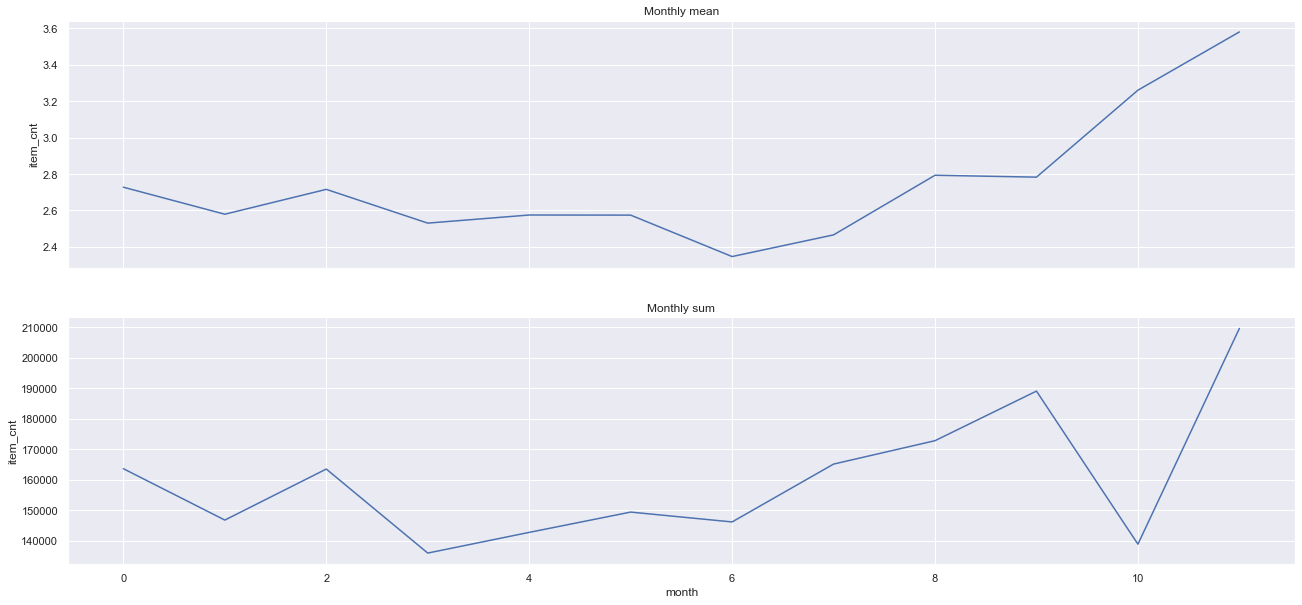

In [28]:
#Now Visulaizing above observations:::

#How sales behaves along the year?

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="item_cnt", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="item_cnt", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

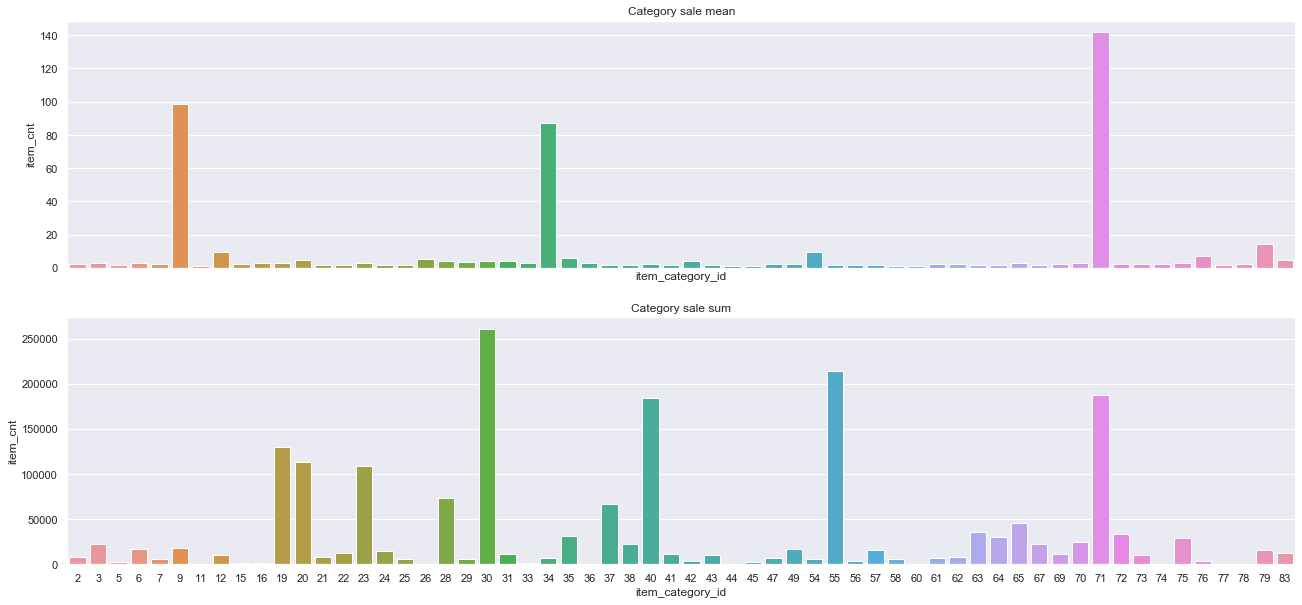

In [29]:
#What category sells more?

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_mean, ax=axes[0]).set_title("Category sale mean")
sns.barplot(x="item_category_id", y="item_cnt", data=gp_category_sum, ax=axes[1]).set_title("Category sale sum")
plt.show()

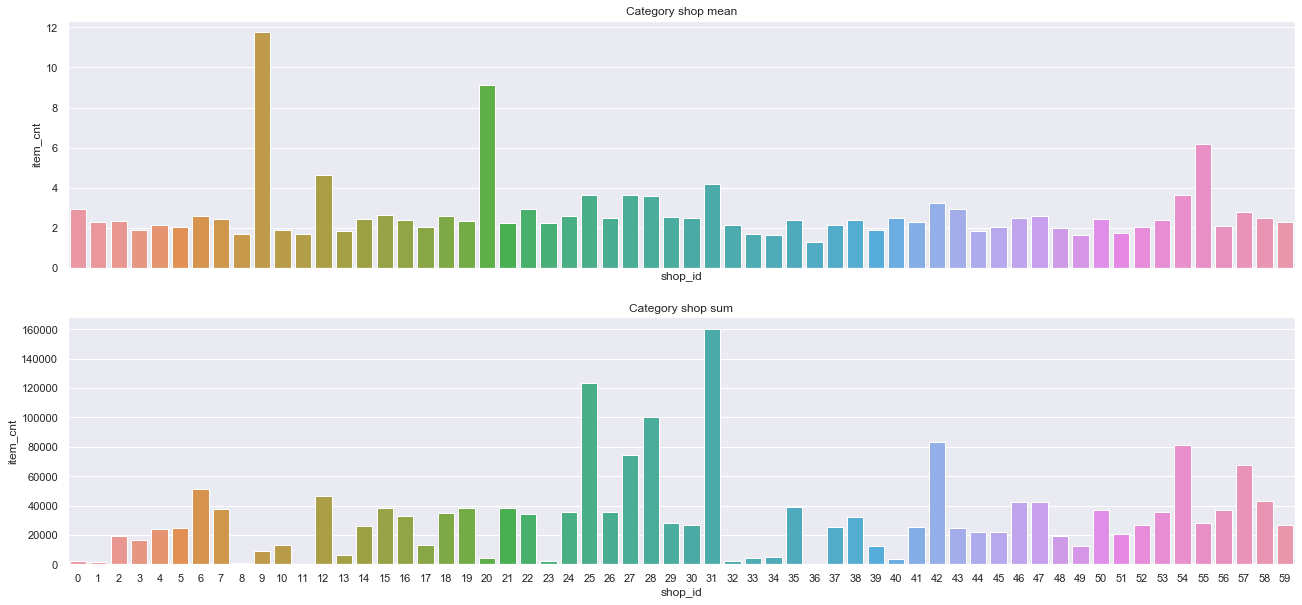

In [30]:
## only few of the categories seems to hold most of the sell count.

# What shop sells more?

f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_mean, ax=axes[0]).set_title("Category shop mean")
sns.barplot(x="shop_id", y="item_cnt", data=gp_shop_sum, ax=axes[1]).set_title("Category shop sum")
plt.show()

### Our observations:::

1. Highest sale recorded in nov and december.
2. lowest sale recorded in may, and its in lower state in starting months.

1. category id 30,50 and 75 are the best sellers.
2. category ids starting 10 are worst sellers.

1. Shop id: 31 has best revenue generated.
2. Most of the shops have a similar sell rate, but 3 of them have a much higher rate, this may be a indicative of the shop size.

##  Checking for outliers

item price and item count.

In [31]:
train_monthly.head()

,date_block_num,shop_id,item_category_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,transactions,year,month
0,0,0,2,5572,7932.00,1322.00,10.00,1.67,6,2013,0
1,0,0,2,5643,10300.00,2060.00,6.00,1.20,5,2013,0
2,0,0,5,5581,1221.00,407.00,3.00,1.00,3,2013,0
3,0,0,5,5583,734.00,367.00,2.00,1.00,2,2013,0
4,0,0,5,5601,412.00,412.00,1.00,1.00,1,2013,0


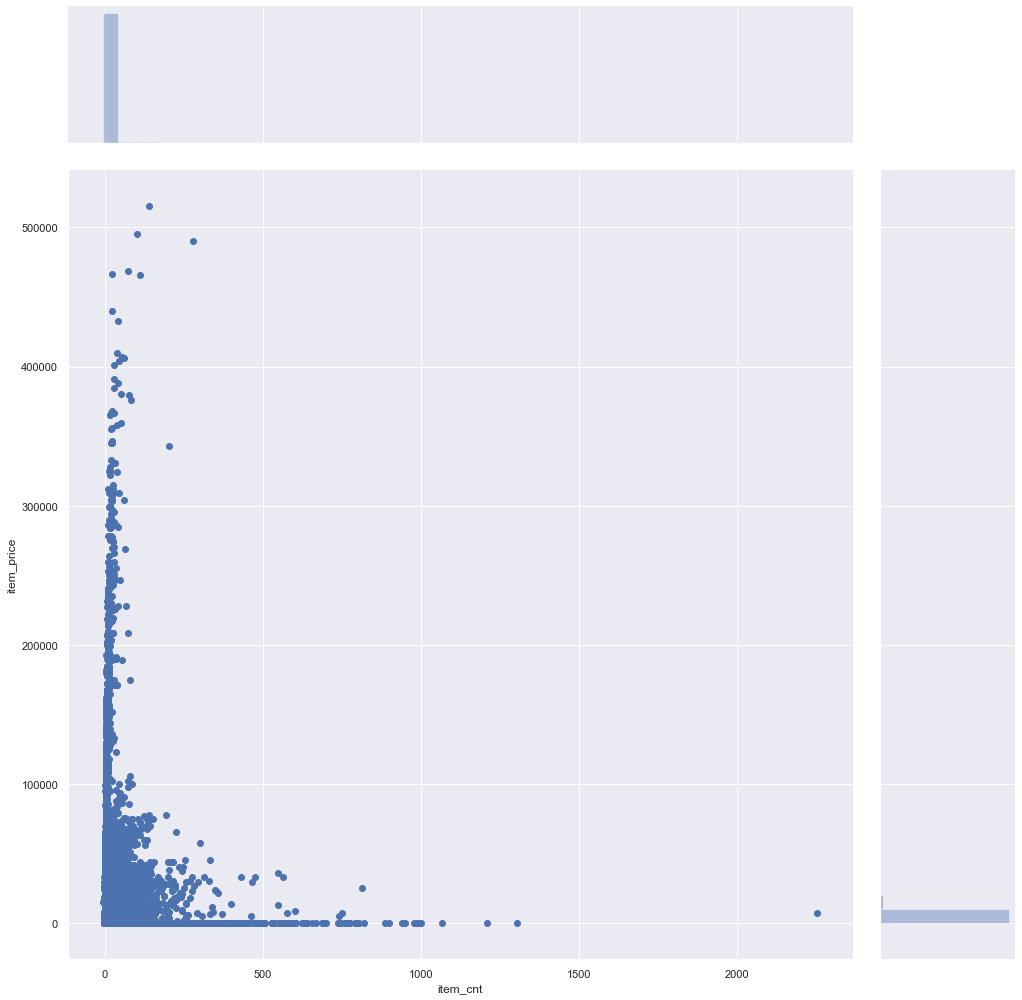

In [32]:
sns.jointplot(x="item_cnt", y="item_price", data=train_monthly, height=14)
plt.show()

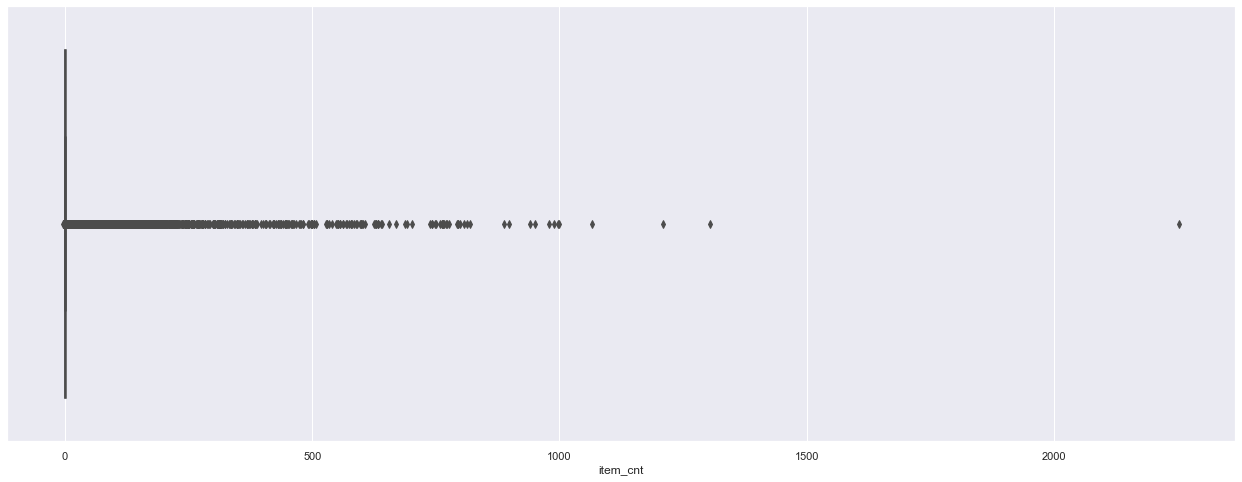

In [33]:
plt.subplots(figsize=(22, 8))
sns.boxplot(train_monthly['item_cnt'])
plt.show()

Removing outliers
I'll treat "item_cnt" > 250 and < 0, "item_price" >= 400000 as outliers, so I'll remove them.

In [34]:
#train_monthly = train_monthly.query('item_cnt >= 0 and item_cnt <= 250 and item_price < 400000')

train_monthly.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,704403.00,19.54,9.15,0.00,13.00,21.00,27.00,33.00
shop_id,704403.00,32.63,16.54,0.00,21.00,31.00,47.00,59.00
item_category_id,704403.00,42.67,17.70,2.00,30.00,40.00,55.00,83.00
item_id,704403.00,10045.51,6192.18,30.00,4424.00,9355.00,15407.00,22167.00
item_price,704403.00,2098.38,7070.14,0.50,299.00,707.68,1834.21,515573.59
mean_item_price,704403.00,897.27,1530.44,0.50,289.46,449.00,1090.00,42990.00
item_cnt,704403.00,2.73,11.43,-4.00,1.00,1.00,2.00,2253.00
mean_item_cnt,704403.00,1.10,1.67,-2.00,1.00,1.00,1.00,1000.00
transactions,704403.00,2.05,2.33,1.00,1.00,1.00,2.00,31.00
year,704403.00,2014.17,0.77,2013.00,2014.00,2014.00,2015.00,2015.00


In [35]:
train_monthly = train_monthly.query('item_cnt >= 0 and item_cnt <= 250 and item_price < 400000')

In [36]:
train_monthly.describe().T
#531 reocrds are outliers.

,count,mean,std,min,25%,50%,75%,max
date_block_num,703872.00,19.54,9.15,0.00,13.00,21.00,27.00,33.00
shop_id,703872.00,32.63,16.54,0.00,21.00,31.00,47.00,59.00
item_category_id,703872.00,42.67,17.69,2.00,30.00,40.00,55.00,83.00
item_id,703872.00,10043.21,6190.58,30.00,4424.00,9355.00,15405.00,22167.00
item_price,703872.00,2089.57,6805.36,0.50,299.00,709.01,1832.00,390830.00
mean_item_price,703872.00,896.62,1525.82,0.50,290.96,449.00,1090.00,42990.00
item_cnt,703872.00,2.58,6.39,0.00,1.00,1.00,2.00,250.00
mean_item_cnt,703872.00,1.09,0.64,0.00,1.00,1.00,1.00,115.00
transactions,703872.00,2.05,2.29,1.00,1.00,1.00,2.00,31.00
year,703872.00,2014.17,0.77,2013.00,2014.00,2014.00,2015.00,2015.00


### Feature engineering

In [37]:
gp_item_price = train_monthly.sort_values('date_block_num').groupby(['item_id'], as_index=False).agg({'item_price':[np.min, np.max]})

In [38]:
gp_item_price.columns = ['item_id', 'hist_min_item_price', 'hist_max_item_price']

train_monthly = pd.merge(train_monthly, gp_item_price, on='item_id', how='left')


In [39]:
train_monthly.head().T

,0,1,2,3,4
date_block_num,0.00,0.00,0.00,0.00,0.00
shop_id,0.00,0.00,0.00,0.00,0.00
item_category_id,2.00,2.00,5.00,5.00,5.00
item_id,5572.00,5643.00,5581.00,5583.00,5601.00
item_price,7932.00,10300.00,1221.00,734.00,412.00
mean_item_price,1322.00,2060.00,407.00,367.00,412.00
item_cnt,10.00,6.00,3.00,2.00,1.00
mean_item_cnt,1.67,1.20,1.00,1.00,1.00
transactions,6.00,5.00,3.00,2.00,1.00
year,2013.00,2013.00,2013.00,2013.00,2013.00


In [40]:
#How much each item's price changed from its (lowest/highest) historical price
train_monthly['price_increase'] = train_monthly['item_price'] - train_monthly['hist_min_item_price']
train_monthly['price_decrease'] = train_monthly['hist_max_item_price'] - train_monthly['item_price']

In [41]:
train_monthly.head().T

,0,1,2,3,4
date_block_num,0.00,0.00,0.00,0.00,0.00
shop_id,0.00,0.00,0.00,0.00,0.00
item_category_id,2.00,2.00,5.00,5.00,5.00
item_id,5572.00,5643.00,5581.00,5583.00,5601.00
item_price,7932.00,10300.00,1221.00,734.00,412.00
mean_item_price,1322.00,2060.00,407.00,367.00,412.00
item_cnt,10.00,6.00,3.00,2.00,1.00
mean_item_cnt,1.67,1.20,1.00,1.00,1.00
transactions,6.00,5.00,3.00,2.00,1.00
year,2013.00,2013.00,2013.00,2013.00,2013.00


## Train/validation split

As we know the test set in on the future, so we should try to simulate the same distribution on our train/validation split.
Our train set will be the first 3~28 blocks, validation will be last 5 blocks (29~32) and test will be block 33.
I'm leaving the first 3 months out because we use a 3 month window to generate features, so these first 3 month won't have really windowed useful features.

In [42]:
#Our label will be the "item_cnt" of the next month, as we are dealing with a forecast problem.

train_monthly['item_cnt_month'] = train_monthly.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['item_cnt'].shift(-1)


train_set = train_monthly.query('date_block_num >= 3 and date_block_num < 28').copy()
validation_set = train_monthly.query('date_block_num >= 28 and date_block_num < 33').copy()
test_set = train_monthly.query('date_block_num == 33').copy()

train_set.dropna(subset=['item_cnt_month'], inplace=True)
validation_set.dropna(subset=['item_cnt_month'], inplace=True)
train_set.dropna(inplace=True)
validation_set.dropna(inplace=True)


In [43]:
print('Train set records:', train_set.shape[0])
print('Validation set records:', validation_set.shape[0])
print('Test set records:', test_set.shape[0])

print('Train set records: %s (%.f%% of complete data)' % (train_set.shape[0], ((train_set.shape[0]/train_monthly.shape[0])*100)))
print('Validation set records: %s (%.f%% of complete data)' % (validation_set.shape[0], ((validation_set.shape[0]/train_monthly.shape[0])*100)))

Train set records: 452180
Validation set records: 85636
Test set records: 29243
Train set records: 452180 (64% of complete data)
Validation set records: 85636 (12% of complete data)


###______________________--------------------------------------____________________________________________----------------


WORKINGGGGGGV _----------------------------------------------------------------------------------------------------

In [44]:
# Shop mean encoding.
gp_shop_mean = train_set.groupby(['shop_id']).agg({'item_cnt_month': ['mean']})
gp_shop_mean.columns = ['shop_mean']
gp_shop_mean.reset_index(inplace=True)
# Item mean encoding.
gp_item_mean = train_set.groupby(['item_id']).agg({'item_cnt_month': ['mean']})
gp_item_mean.columns = ['item_mean']
gp_item_mean.reset_index(inplace=True)
# Shop with item mean encoding.
gp_shop_item_mean = train_set.groupby(['shop_id', 'item_id']).agg({'item_cnt_month': ['mean']})
gp_shop_item_mean.columns = ['shop_item_mean']
gp_shop_item_mean.reset_index(inplace=True)
# Year mean encoding.
gp_year_mean = train_set.groupby(['year']).agg({'item_cnt_month': ['mean']})
gp_year_mean.columns = ['year_mean']
gp_year_mean.reset_index(inplace=True)
# Month mean encoding.
gp_month_mean = train_set.groupby(['month']).agg({'item_cnt_month': ['mean']})
gp_month_mean.columns = ['month_mean']
gp_month_mean.reset_index(inplace=True)

# Add meand encoding features to train set.
train_set = pd.merge(train_set, gp_shop_mean, on=['shop_id'], how='left')
train_set = pd.merge(train_set, gp_item_mean, on=['item_id'], how='left')
train_set = pd.merge(train_set, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
train_set = pd.merge(train_set, gp_year_mean, on=['year'], how='left')
train_set = pd.merge(train_set, gp_month_mean, on=['month'], how='left')
# Add meand encoding features to validation set.
validation_set = pd.merge(validation_set, gp_shop_mean, on=['shop_id'], how='left')
validation_set = pd.merge(validation_set, gp_item_mean, on=['item_id'], how='left')
validation_set = pd.merge(validation_set, gp_shop_item_mean, on=['shop_id', 'item_id'], how='left')
validation_set = pd.merge(validation_set, gp_year_mean, on=['year'], how='left')
validation_set = pd.merge(validation_set, gp_month_mean, on=['month'], how='left')


In [45]:
# Create train and validation sets and labels. 
X_train = train_set.drop(['item_cnt_month', 'date_block_num'], axis=1)
Y_train = train_set['item_cnt_month'].astype(int)
X_validation = validation_set.drop(['item_cnt_month', 'date_block_num'], axis=1)
Y_validation = validation_set['item_cnt_month'].astype(int)

In [46]:
# Integer features (used by catboost model).
int_features = ['shop_id', 'item_id', 'year', 'month']

X_train[int_features] = X_train[int_features].astype('int32')
X_validation[int_features] = X_validation[int_features].astype('int32')


Build test set
We want to predict for "date_block_num" 34 so our test set will be block 33 and our predictions should reflect block 34 values. In other words we use block 33 because we want to forecast values for block 34.



In [47]:
latest_records = pd.concat([train_set, validation_set]).drop_duplicates(subset=['shop_id', 'item_id'], keep='last')
X_test = pd.merge(data_test, latest_records, on=['shop_id', 'item_id'], how='left', suffixes=['', '_'])
X_test['year'] = 2015
X_test['month'] = 9
X_test.drop('item_cnt_month', axis=1, inplace=True)
X_test[int_features] = X_test[int_features].astype('int32')
X_test = X_test[X_train.columns]


In [48]:
# I'm dropping "item_category_id", we don't have it on test set and would be a little hard to create categories for items that exist only on test set.
X_train.drop(['item_category_id'], axis=1, inplace=True)
X_validation.drop(['item_category_id'], axis=1, inplace=True)
X_test.drop(['item_category_id'], axis=1, inplace=True)

In [49]:
X_test.head().T

,0,1,2,3,4
shop_id,5.00,5.00,5.00,5.00,5.00
item_id,5037.00,5320.00,5233.00,5232.00,5268.00
item_price,2997.50,nan,2997.00,nan,nan
mean_item_price,999.17,nan,999.00,nan,nan
item_cnt,3.00,nan,3.00,nan,nan
mean_item_cnt,1.00,nan,1.00,nan,nan
transactions,3.00,nan,3.00,nan,nan
year,2015.00,2015.00,2015.00,2015.00,2015.00
month,9.00,9.00,9.00,9.00,9.00
hist_min_item_price,749.00,nan,599.00,nan,nan


In [54]:
#Replacing missing values.
sets = [X_train, X_validation, X_test]

# This was taking too long.
# Replace missing values with the median of each item.
# for dataset in sets:
#     for item_id in dataset['item_id'].unique():
#         for column in dataset.columns:
#             item_median = dataset[(dataset['item_id'] == item_id)][column].median()
#             dataset.loc[(dataset[column].isnull()) & (dataset['item_id'] == item_id), column] = item_median

# Replace missing values with the median of each shop.            
for dataset in sets:
    for shop_id in dataset['shop_id'].unique():
        for column in dataset.columns:
            shop_median = dataset[(dataset['shop_id'] == shop_id)][column].median()
            dataset.loc[(dataset[column].isnull()) & (dataset['shop_id'] == shop_id), column] = shop_median
            
# Fill remaining missing values on test set with mean.
X_test.fillna(X_test.mean(), inplace=True)





In [74]:
#X_test.info()
Y_train.describe()
#X_validation.info()
Y_validation.describe()

count   85636.00
mean        2.25
std         4.40
min         0.00
25%         1.00
50%         1.00
75%         2.00
max       246.00
Name: item_cnt_month, dtype: float64

Modeling the data

In [75]:
X_train.shape,Y_train.shape,X_test.shape

((452180, 18), (452180,), (214200, 18))

In [78]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_validation, Y_validation) * 100, 2)
#X_validation, Y_validation
acc_knn

52.9

In [79]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_validation, Y_validation) * 100, 2)
#X_validation, Y_validation
acc_decision_tree

42.05

In [81]:
#RANDOMFORREST


# Use only part of features on random forest.
rf_features = ['shop_id', 'item_id', 'item_cnt', 'transactions', 'year', 
               'shop_mean', 'item_mean', 'mean_item_cnt']
rf_train = X_train[rf_features]
rf_val = X_validation[rf_features]
rf_test = X_test[rf_features]


In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(rf_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [84]:
rf_train_pred = rf_model.predict(rf_train)
rf_val_pred = rf_model.predict(rf_val)
rf_test_pred = rf_model.predict(rf_test)

In [86]:
from sklearn.metrics import mean_squared_error
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, rf_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_validation, rf_val_pred)))

Train rmse: 3.0314945573139913
Validation rmse: 2.6582951535542256
